<a href="https://colab.research.google.com/github/queensyaaty/folium_project_n3ts/blob/main/Queensya_Athya_X_2_Kota_Denpasarr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Tugas Project

1. import folium, pandas, geopandas, dan drive.
2. load data shapefile, pilih kota/kabupaten yang akan dianalisis
3. load data csv dan proses merge/join data
4. load peta choropleth

In [1]:
# Import Library

import folium
import pandas as pd
import geopandas as gpd
from google.colab import drive

Pilih nama kota / kabupaten kalian. jika tidak muncul pastikan namanya sesuai dengan nama di link berikut :
https://geoservices.big.go.id/portal/apps/webappviewer/index.html?id=cb58db080712468cb4bfd408dbde3d70

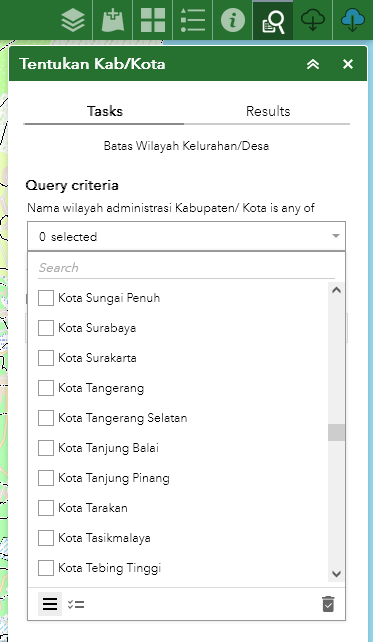

In [2]:
# Read Data Shapefile

drive.mount('/content/drive')

# Shapefile Admin Indonesia (tidak usah diubah2) Warning! File besar 1.4gb
indonesia_admin = gpd.read_file('/content/drive/MyDrive/ADMIN_INDO/ADMINISTRASI_AR_DESAKEL_10K.shp')

# Pilih Kota/Kabupaten yang ingin ditampilkan, contoh 'Kota Tangerang Selatan'
aoi_admin = indonesia_admin[indonesia_admin['WADMKK'] == 'Kota Denpasar']

Mounted at /content/drive


In [3]:
# CSV file path
csv_path = '/content/drive/MyDrive/KK_DENPASAR_B.csv'

# Read shapefile
admin_gdf = aoi_admin

# Read CSV data
csv_data = pd.read_csv(csv_path)

print(csv_data.head())
print(admin_gdf.head())
# Convert column names to lowercase
csv_data['Kelurahan'] = csv_data['Kelurahan'].str.lower().str.replace(' ', '')
admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.lower().str.replace(' ', '')
#csv_data['Jumlah_kk'] = csv_data['Jumlah_kk'].astype(str).str.replace('.', '')
#csv_data['Jumlah_kk'] = pd.to_numeric(csv_data['Jumlah_kk'])

# Fix typo to merge properly
#admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.replace('pondokjagungt', 'pondokjagung')
#csv_data['Kelurahan'] = csv_data['Kelurahan'].str.replace('perigibaru', 'parigibaru')

# Merge data
merged_data = pd.merge(admin_gdf, csv_data, left_on='NAMOBJ', right_on='Kelurahan', how='left')

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

print(merged_gdf.head())
# Now you can use merged_gdf for further analysis and visualization

          KECAMATAN Kelurahan  KK LAKI-LAKI  KK PEREMPUAN  Jumlah_kk
0  DENPASAR SELATAN  SERANGAN           957            90       1047
1  DENPASAR SELATAN  PEDUNGAN          5454           571       6025
2  DENPASAR SELATAN   SESETAN          9280          1243      10523
3  DENPASAR SELATAN    PANJER          5420           716       6136
4  DENPASAR SELATAN     RENON          2645           425       3070
      OBJECTID              NAMOBJ       FCODE REMARK  \
8800    8801.0         Dangin Puri  BA03070040   None   
8801    8802.0    Dangin Puri Kaja  BA03070040   None   
8802    8803.0  Dangin Puri Kangin  BA03070040   None   
8803    8804.0    Dangin Puri Kauh  BA03070040   None   
8804    8805.0   Dangin Puri Kelod  BA03070040   None   

                                          METADATA     SRS_ID KDBBPS KDCBPS  \
8800  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
8801  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
8802  

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [4]:
# Create a base map
m = folium.Map(location=[-8.6725048,115.14187], zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "Jumlah_kk"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah_kk"
).add_to(m)

jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah_KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','Jumlah_kk'],
        aliases=['Kelurahan','Jumlah_kk'])
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

In [5]:
# Create a base map
m = folium.Map(location=[-8.6725048,115.14187], zoom_start=13)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name="Jumlah KK Kelurahan Denpsar",
    data=merged_gdf,
    columns=["Kelurahan", "Jumlah_kk"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah_kk"
).add_to(m)

# Create/import data sma
# The original path was 'content/drive/MyDrive/sman_denpasar.csv'
# It's likely the file is located in '/content/drive/MyDrive/sman_denpasar.csv'
data_sma = pd.read_csv('/content/drive/MyDrive/sman_denpasar.csv')

data_sma['geometry'] = gpd.GeoSeries.from_wkt(data_sma['WKT'])

# Extract latitude and longitude from Point geometries
data_sma['latitude'] = data_sma['geometry'].apply(lambda x: x.y)
data_sma['longitude'] = data_sma['geometry'].apply(lambda x: x.x)

# Add markers to the map
# Create a marker layer
marker_layer = folium.FeatureGroup(name="SMAN Denpasar")

# Add markers to the layer
for i in range(0, len(data_sma)):
    folium.Marker([data_sma.iloc[i]['latitude'], data_sma.iloc[i]['longitude']], popup=data_sma.iloc[i]['nama']).add_to(marker_layer)

m.add_child(marker_layer)

# Add Jumlah_KK layer map
jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah_KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['NAMOBJ','Jumlah_kk'],
        aliases=['Kelurahan','Jumlah_kk']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m


Analysis Question:
Kelurahan mana yang memiliki jumlah KK dengan kelas tertinggi (Merah Tua)?

Jawab:  Sesetan

Kelurahan apa saja yang tidak terdapat Sekolah Negeri?

Jawab: padangsambian
⁠tegalharum
⁠pemogan
⁠dauhpurikauh
⁠sesetan
⁠renon
⁠sanurkauh
⁠sanur
⁠ serangan
⁠padangsambiankaja
⁠pemecutankaja
⁠ubungkaja
⁠peguyangan
⁠tonja
⁠danginpurikaja
⁠danginpurikauh
⁠dauhpurikangin
⁠dauhpuri
⁠pemecutan
⁠danginpurikelod
⁠sumertakelod
⁠sanurkaja
⁠sumertakauh
⁠penatih
⁠penatihdanginpuri
⁠peguyangankangin
⁠peguyangankaja
⁠ubung
⁠tegalharum
